<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colours
import glob
import os
from random import randrange
from sys import getsizeof

from sklearn.cluster import AgglomerativeClustering

import imghdr

In [2]:
image_path="C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/photo_villa/*.jpg"
image_list = glob.glob(image_path)
print(image_list)

['C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/photo_villa\\CAM39_2017_09_11_20_40.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/photo_villa\\CAM39_2017_09_11_21_04.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/photo_villa\\CAM39_2017_09_11_21_30.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/photo_villa\\CAM39_2017_09_11_21_54.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/photo_villa\\CAM39_2017_09_11_22_19.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/photo_villa\\CAM39_2017_09_11_22_43.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/photo_villa\\CAM39_2017_09_11_23_09.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/photo_villa\\CAM39_2017_09_11_23_34.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/photo_villa\\CAM39_2017_09_11_23_56.jpg', 'C:/Users

In [3]:
n_elem=len(os.listdir("C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/photo_villa"))
print(n_elem)

1217


In [4]:
size = 400,300
image_matrix = np.zeros((n_elem,300*400*3), dtype=int)
for i,image in enumerate(image_list):
    taken = Image.open( image )
    taken.thumbnail(size,Image.ANTIALIAS)
    image_matrix[i] = np.asarray(taken).ravel()

In [5]:
#with open('C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/label.txt',"w") as f:
#    for i in range(n_elem):
#        f.write(("%d = \n" % (i+1)))

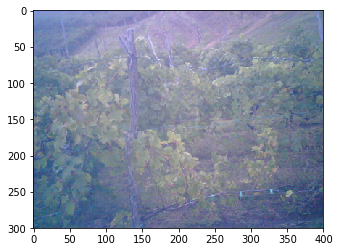

In [6]:
plt.imshow(image_matrix[26].reshape(300,400,3))

In [7]:
#y = open('C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/label.txt',"r").split

with open('C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/label_backup.txt',"r") as f:
    y = f.read().splitlines()

labels = [int(x.split(' = ')[1]) for x in y]    
print(len(labels))



1217


In [8]:
image_matrix[247].mean()

138.86285833333332

In [9]:
for i in range(1027):
    print(i,image_matrix[i].mean())

0 5.115647222222222
1 7.303672222222223
2 6.292658333333334
3 7.58775
4 5.876933333333334
5 8.005205555555555
6 6.562591666666667
7 2.4818277777777777
8 6.593413888888889
9 5.996636111111111
10 4.876619444444445
11 3.168563888888889
12 4.5726611111111115
13 7.983702777777777
14 2.5917805555555558
15 1.3740138888888889
16 6.493627777777778
17 7.880952777777778
18 6.500780555555555
19 1.4138055555555555
20 5.606730555555556
21 2.683822222222222
22 4.906513888888889
23 3.381772222222222
24 6.878863888888889
25 10.169019444444444
26 137.01863055555555
27 135.77061944444443
28 138.33144166666668
29 141.34189166666667
30 137.45245555555556
31 138.7136277777778
32 139.21280555555555
33 141.27366111111112
34 136.7168472222222
35 2.6133694444444444
36 4.0270777777777775
37 4.366463888888889
38 8.310380555555556
39 3.198175
40 4.937366666666667
41 3.2323
42 3.180988888888889
43 3.9459305555555555
44 3.4165805555555555
45 3.0167527777777776
46 2.0238694444444443
47 5.919352777777778
48 1.92738611

In [10]:
red_X = []
red_y = []
for i in range(n_elem):
    if(image_matrix[i].mean() > 70):
        red_X.append(image_matrix[i])
        red_y.append(y[i])

red_X = np.asarray(red_X)
red_y = np.asarray(red_y)

print(red_X.shape, red_y.shape)

(330, 360000) (330,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(image_matrix,labels,test_size=0.3,random_state=37)

In [12]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
original_gnb_acc=gnb.score(X_test,y_test)

In [13]:
print(original_gnb_acc)

0.9808743169398907


In [14]:
pred = gnb.predict(image_matrix)
for i in range(len(pred)):
    if(pred[i] != labels[i]):
        print(i)

437
674
1094
1118
1126
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1170


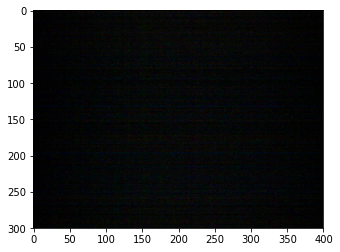

In [15]:
plt.imshow(X_test[52].reshape(300,400,3))
        

In [16]:
image_path="C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/1/*.jpg"
image_list_1 = glob.glob(image_path)
y_1=[]

w = 775
h = 581
size=(775,581)

X_1 = np.zeros((len(image_list_1),h*w*3), dtype=int)
for i,image in enumerate(image_list_1):
    taken = Image.open( image )
    taken.thumbnail(size,Image.ANTIALIAS)
    X_1[i] = np.asarray(taken).ravel()
    y_1.append(1)

print(image_list_1)

['C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/1\\CAM39_2017_09_12_06_57.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/1\\CAM39_2017_09_12_07_25.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/1\\CAM39_2017_09_12_07_52.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/1\\CAM39_2017_09_12_08_20.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/1\\CAM39_2017_09_12_08_47.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/1\\CAM39_2017_09_12_11_37.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/1\\CAM39_2017_09_12_18_37.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/1\\CAM39_2017_09_12_19_05.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/1\\CA

In [17]:
image_path="C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/0/*.jpg"
image_list_0 = glob.glob(image_path)
y_0=[]

w = 775
h = 581
size=(775,581)

X_0 = np.zeros((len(image_list_0),h*w*3), dtype=int)
for i,image in enumerate(image_list_0):
    taken = Image.open( image )
    taken.thumbnail(size,Image.ANTIALIAS)
    X_0[i] = np.asarray(taken).ravel()
    y_0.append(0)

print(image_list_0)

['C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/0\\CAM39_2017_09_12_06_32.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/0\\CAM39_2017_09_12_06_57-glitched-4-4-2019-12-03-37.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/0\\CAM39_2017_09_12_07_25-glitched-4-4-2019-12-04-15.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/0\\CAM39_2017_09_12_07_52-glitched-4-4-2019-12-04-29.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/0\\CAM39_2017_09_12_08_20-glitched-4-4-2019-12-04-42.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/0\\CAM39_2017_09_12_11_37-glitched-4-4-2019-12-04-56.jpg', 'C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/0\\CAM39_2017_09_12_11_37-glitched-4-4-2019-12-05-58.jpg', 'C:/Users/pcava/Desktop/Università/2_II

In [18]:
X = np.vstack((X_0, X_1))
y = y_0+y_1
print(y)
print(X)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

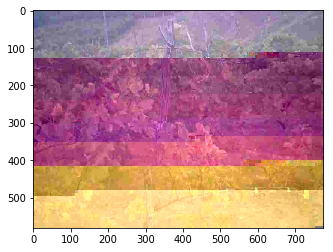

In [19]:
plt.imshow(X[80].reshape(h,w,3))

In [ ]:

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
km = KMeans(n_clusters=2, random_state=2)
y_pred =km.fit_predict(X)
print(km.score(X,y))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
original_gnb_acc=gnb.score(X_test,y_test)
print(original_gnb_acc)

0.9874213836477987


In [23]:
from sklearn import neighbors, datasets
knn = neighbors.KNeighborsClassifier(5, 'uniform')
knn.fit(X_train,y_train)
original_knn_acc=knn.score(X_test,y_test)
print(original_knn_acc)

0.949685534591195


1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0


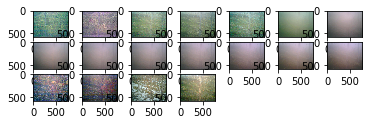

In [54]:
y_pred = gnb.predict(X)
j=0
plt
for i,x in enumerate(X):
    if y[i]!=y_pred[i]:
        j=j+1
        plt.subplot(7,7,j)
        plt.imshow(x.reshape(h,w,3))
        print(y_pred[i])

In [118]:
image_path_test="C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/test/*.jpg"
image_list_test = glob.glob(image_path_test)

size = 775,581
w = 775
h = 581


image = image_list_test[4]
taken = Image.open( image )

taken.thumbnail((w+100,h+100),Image.ANTIALIAS)
taken.show()
if(taken.size[0]>h or taken.size[1]>w):
    cropped_example = taken.crop((0, 0, 775, 581))
cropped_example.show()

(18, 1350825)
(18, 1350825)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


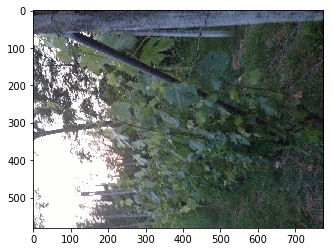

In [119]:
image_path_test="C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/image_dataset/test/*.jpg"
image_list_test = glob.glob(image_path_test)

size = 775,581
w = 775
h = 581
test = np.zeros((len(image_list_test),h*w*3), dtype=int)
for i,image in enumerate(image_list_test):
    taken = Image.open( image )
    taken.thumbnail((w+100,w+100),Image.ANTIALIAS)
    if(taken.size[0]>h or taken.size[1]>w):
        taken = taken.crop((0, 0, 775, 581))
    if(test[0].size == np.prod(np.asarray(taken).shape)):
        test[i] = np.asarray(taken).ravel()
    else:
        print("Element [",i,"] is not suitable for classification. Resize it.")
print(test.shape)

test = test[~np.all(test == 0, axis=1)]

print(test.shape)

plt.imshow(test[1].reshape(h,w,3))
    
y_pred = gnb.predict(test)
print(y_pred)

In [1]:
# image_path="C:/Users/pcava/Desktop/Università/2_II_InnovativeWireless/_Project/foto/*"
# image_list = glob.glob(image_path)
# print(len(image_list))

# w = 1024
# h = 768

# n_elem = len(image_list)
# w_2 = int(w/2)
# h_2 = int(h/2)

# image_matrix = np.zeros((n_elem,w*h*3),dtype=float)
# for i,image in enumerate(image_list):
#     taken = Image.open( image ) 
#     taken = np.asarray(taken,)
#     image_matrix[i] = taken.ravel()

# AgglomerativeClustering.fit(X=image_matrix)